### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from warnings import filterwarnings
#adfuller is required for dicky fuller test which can test data for stationarity of the data
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [99]:
data = pd.read_csv('footfalls.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.set_index('Month', inplace=True)
data

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,,,,,
1991-01-01,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-02-01,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
1991-03-01,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
1991-04-01,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
1991-05-01,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-11-01,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
2003-12-01,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-01,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df = data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Footfalls      159 non-null    int64  
 1   t              159 non-null    int64  
 2   log_footfalls  159 non-null    float64
 3   t_square       159 non-null    int64  
 4   Jan            159 non-null    int64  
 5   Feb            159 non-null    int64  
 6   Mar            159 non-null    int64  
 7   Apr            159 non-null    int64  
 8   May            159 non-null    int64  
 9   Jun            159 non-null    int64  
 10  Jul            159 non-null    int64  
 11  Aug            159 non-null    int64  
 12  Sep            159 non-null    int64  
 13  Oct            159 non-null    int64  
 14  Nov            159 non-null    int64  
 15  Dec            159 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 21.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Footfalls,159.0,1822.226415,181.601732,1361.000000,1698.5000,1831.000000,1967.000000,2223.000000
t,159.0,80.000000,46.043458,1.000000,40.5000,80.000000,119.500000,159.000000
log_footfalls,159.0,7.502746,0.101775,7.215975,7.4375,7.512618,7.584265,7.706613
t_square,159.0,8506.666667,7605.556039,1.000000,1640.5000,6400.000000,14280.500000,25281.000000
Jan,159.0,0.088050,0.284263,0.000000,0.0000,0.000000,0.000000,1.000000
Feb,159.0,0.088050,0.284263,0.000000,0.0000,0.000000,0.000000,1.000000
Mar,159.0,0.088050,0.284263,0.000000,0.0000,0.000000,0.000000,1.000000
Apr,159.0,0.081761,0.274866,0.000000,0.0000,0.000000,0.000000,1.000000
May,159.0,0.081761,0.274866,0.000000,0.0000,0.000000,0.000000,1.000000
Jun,159.0,0.081761,0.274866,0.000000,0.0000,0.000000,0.000000,1.000000


In [7]:
#Checking for null values
df.isnull().sum()

Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [38]:
#splitting our data for training
train = df[:int(0.75*(len(df)))]
valid = df[int(0.75*(len(df))):]

In [39]:
#we will be using 25% of the data for test data
#Test data
print("Length of test dataset ",len(valid))
valid.head()

Length of test dataset  40


,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,,,,,
2000-12-01,2000,120,7.600902,14400,0,0,0,0,0,0,0,0,0,0,0,1
2001-01-01,1683,121,7.428333,14641,1,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1663,122,7.416378,14884,0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,2008,123,7.604894,15129,0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,2024,124,7.612831,15376,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
#We areconverting the int data to float
train_df = train
train_df['Footfalls'] = train_df['Footfalls'].astype(float)
train_df.head()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,,,,,
1991-01-01,1709.0,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-02-01,1621.0,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
1991-03-01,1973.0,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
1991-04-01,1812.0,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
1991-05-01,1975.0,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Month', ylabel='Footfalls'>

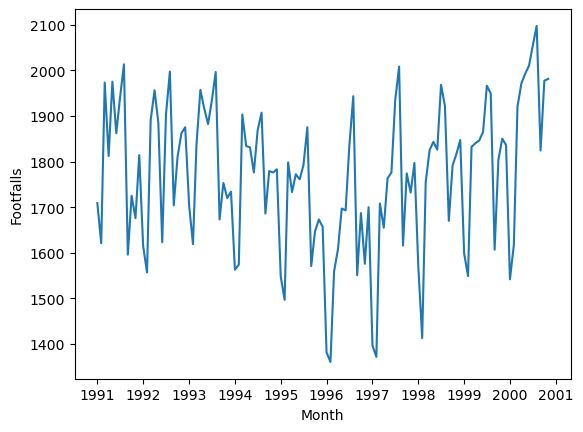

In [41]:
#plotting Train data
sns.lineplot(x="Month", y="Footfalls",legend = 'full' , data=train_df)

In [42]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test on the training data
result = adfuller(train_df['Footfalls'], autolag='AIC')

# Extract and print the p-value
p_value = result[1]
print(f'p-value: {p_value}')

# Interpret the result
if p_value <= 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")


p-value: 0.9250672527304634
The time series is non-stationary (fail to reject the null hypothesis)


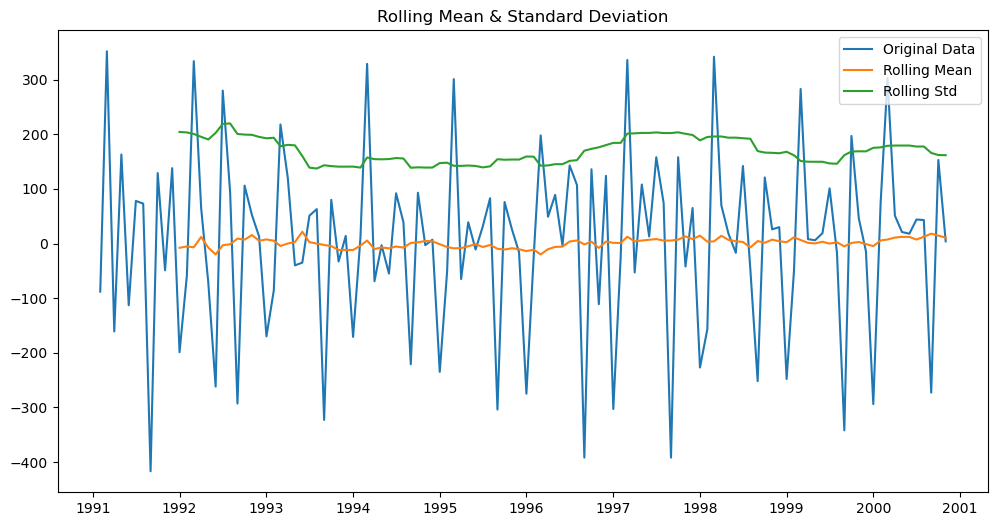

ADF Statistic: -4.160023933105899
p-value: 0.0007694375185615294
The time series is stationary (reject the null hypothesis)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Calculate the first difference
first_diff = train_df['Footfalls'] - train_df['Footfalls'].shift(1)
first_diff = first_diff.dropna()

# Define a function to test stationarity with a rolling window
def test_stationarity_with_rolling(ts, window=12):
    # Calculate rolling statistics
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    p_value = result[1]

    # Interpret the result
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    if p_value <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")

# Test stationarity with rolling window
test_stationarity_with_rolling(first_diff, window=12)


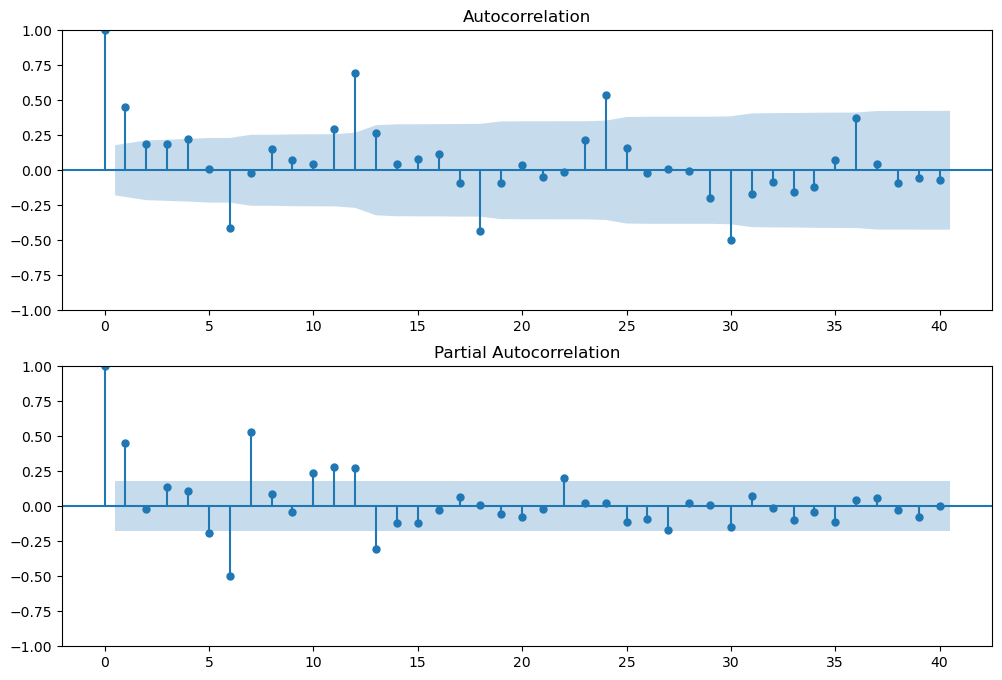

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(train_df['Footfalls'], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(train_df['Footfalls'], lags=40, ax=ax2)
plt.show()


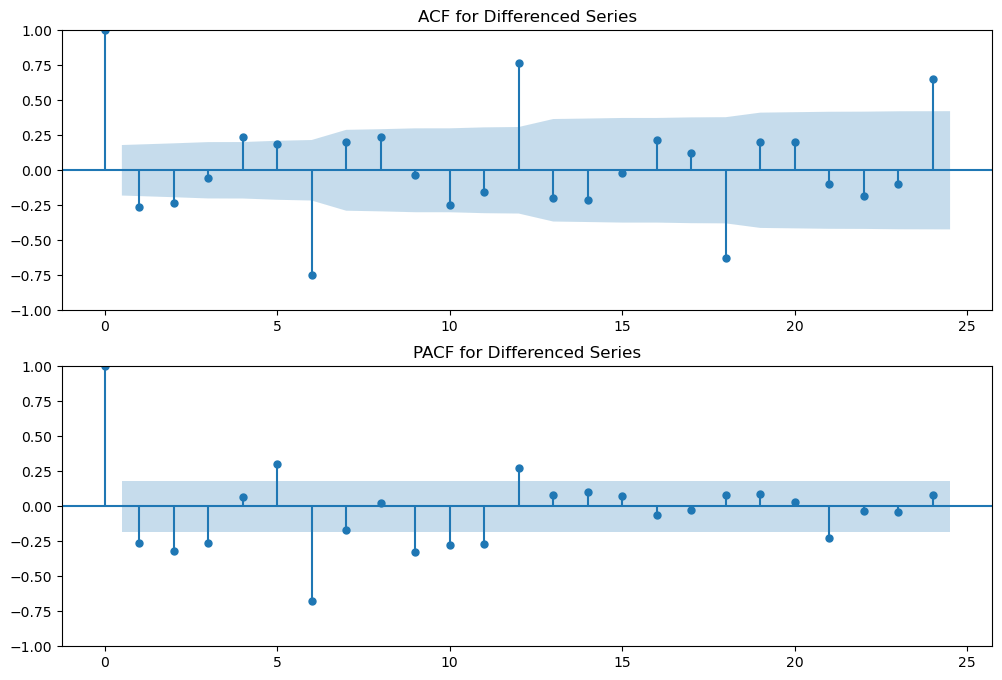

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Plot the ACF
sm.graphics.tsa.plot_acf(first_diff, lags=24, ax=ax1)  # Plotting up to 24 lags
ax1.set_title('ACF for Differenced Series')

# Plot the PACF
sm.graphics.tsa.plot_pacf(first_diff, lags=24, ax=ax2)  # Plotting up to 24 lags
ax2.set_title('PACF for Differenced Series')

plt.show()


In [46]:
import statsmodels.api as sm

# Define the order of the ARIMA model (p, d, q)
p, d, q = 1, 1, 1  # You can adjust these values based on the ACF and PACF plots

# Fit the ARIMA model
arima_mod = sm.tsa.ARIMA(train_df['Footfalls'], order=(p, d, q)).fit()

# Print the summary of the model
print(arima_mod.summary())


                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -752.950
Date:                Sun, 20 Aug 2023   AIC                           1511.899
Time:                        20:40:02   BIC                           1520.211
Sample:                    01-01-1991   HQIC                          1515.274
                         - 11-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3733      0.104      3.593      0.000       0.170       0.577
ma.L1         -0.9236      0.057    -16.255      0.000      -1.035      -0.812
sigma2      2.017e+04   3377.576      5.971      0.0

In [47]:
# Forecast 10 steps into the future
forecast = arima_mod.forecast(steps=10)
forecast

2000-12-01    1916.074580
2001-01-01    1891.840843
2001-02-01    1882.795479
2001-03-01    1879.419251
2001-04-01    1878.159058
2001-05-01    1877.688684
2001-06-01    1877.513115
2001-07-01    1877.447583
2001-08-01    1877.423122
2001-09-01    1877.413992
Freq: MS, Name: predicted_mean, dtype: float64

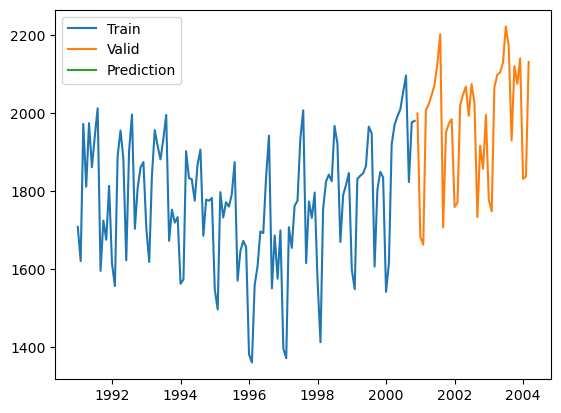

In [50]:
# Plotting the forecasted values against validation dataset
forecast_1 = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])
plt.plot(train.Footfalls, label='Train')
plt.plot(valid.Footfalls, label='Valid')
plt.plot(forecast_1, label='Prediction')
plt.legend()
plt.show()


In [57]:
#Importing mean squared error
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(valid.Footfalls,forecast))
print("Validation RMS",rms)

Validation RMS 181.89195641208588


In [60]:
#defining MAPE function
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(valid.Footfalls,forecast)
print("The MAPE for Validation is ",mape)


The MAPE for Validation is  8.15566781895608


In [61]:
forecast = arima_mod.forecast(steps = 10)
print(forecast)

2000-12-01    1916.074580
2001-01-01    1891.840843
2001-02-01    1882.795479
2001-03-01    1879.419251
2001-04-01    1878.159058
2001-05-01    1877.688684
2001-06-01    1877.513115
2001-07-01    1877.447583
2001-08-01    1877.423122
2001-09-01    1877.413992
Freq: MS, Name: predicted_mean, dtype: float64


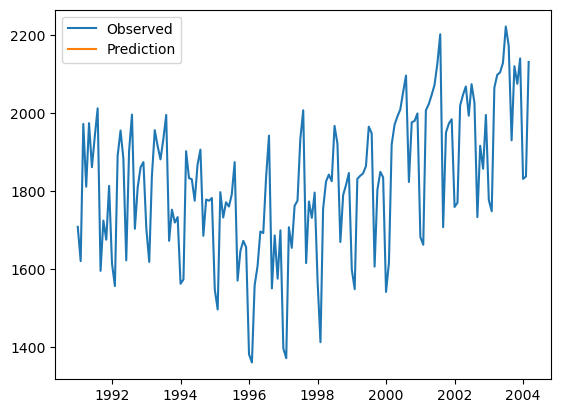

In [62]:
forecast_2 = pd.DataFrame(forecast, index=np.array(range(2132, 2142)), columns=['Prediction'])
plt.plot(df.index, df.Footfalls, label='Observed')
plt.plot(forecast_2.index, forecast_2['Prediction'], label='Prediction')
plt.legend()
plt.show()


In [63]:
mod = sm.tsa.statespace.SARIMAX(train_df.Footfalls,
 order=(2, 2, 2),
 seasonal_order=(0, 2, 2, 12),
 enforce_stationarity=False,
 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8380         -0        inf      0.000      -0.838      -0.838
ar.L2         -0.1827         -0        inf      0.000      -0.183      -0.183
ma.L1         -0.2989    2.9e-33  -1.03e+32      0.000      -0.299      -0.299
ma.L2         -0.3029   2.17e-33  -1.39e+32      0.000      -0.303      -0.303
ma.S.L12   -1.512e+14   2.99e-33  -5.06e+46      0.000   -1.51e+14   -1.51e+14
ma.S.L24    5.372e+12   5.67e-47   9.47e+58      0.000    5.37e+12    5.37e+12
sigma2      2.179e-11   2.36e-10      0.092      0.926    -4.4e-10    4.84e-10


In [64]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Define a function for ADF test
def adf_test(series):
    # Perform Dickey-Fuller test:
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Apply ADF test on the 'Footfalls' series
adf_results = adf_test(df['Footfalls'])

# Print the results
print("Results of Dickey-Fuller Test:")
print(adf_results)


Results of Dickey-Fuller Test:
Test Statistic                  -0.234991
p-value                          0.934220
#Lags Used                      14.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


Results of Dickey-Fuller Test for Differenced Series:
Test Statistic                  -3.326843
p-value                          0.013720
#Lags Used                      13.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


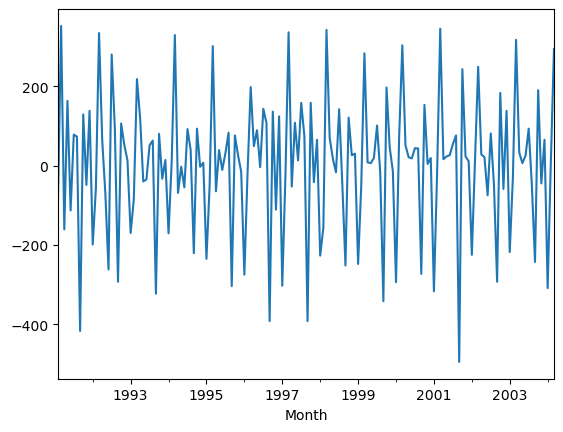

In [65]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Define a function for ADF test
def adf_test(series):
    # Perform Dickey-Fuller test:
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Create a differenced time series
ts_t_adj = df['Footfalls'] - df['Footfalls'].shift(1)
ts_t_adj = ts_t_adj.dropna()

# Plot the differenced time series
ts_t_adj.plot()

# Apply ADF test on the differenced series
adf_results = adf_test(ts_t_adj)

# Print the results
print("Results of Dickey-Fuller Test for Differenced Series:")
print(adf_results)


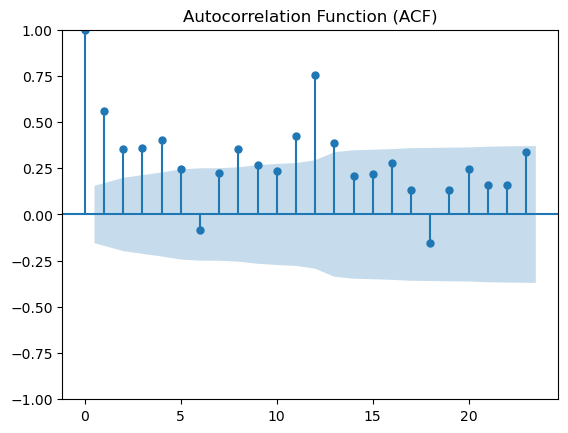

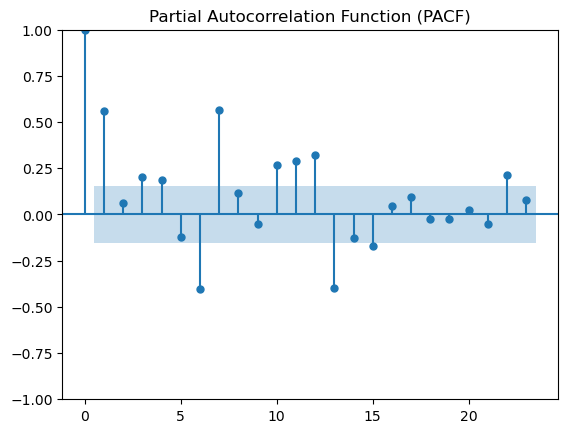

In [66]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['Footfalls'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(df['Footfalls'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


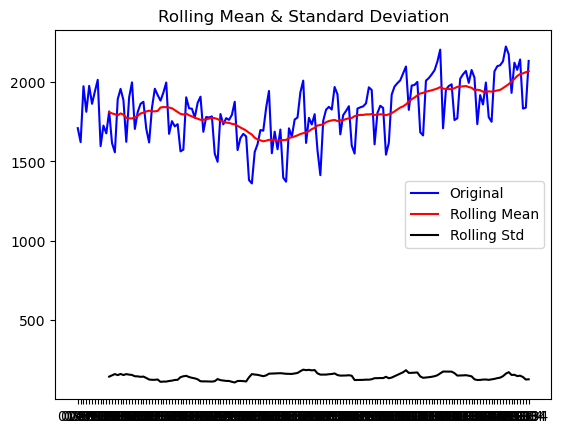

Results of Dickey-Fuller Test:
Test Statistic                  -0.234991
p-value                          0.934220
#Lags Used                      14.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


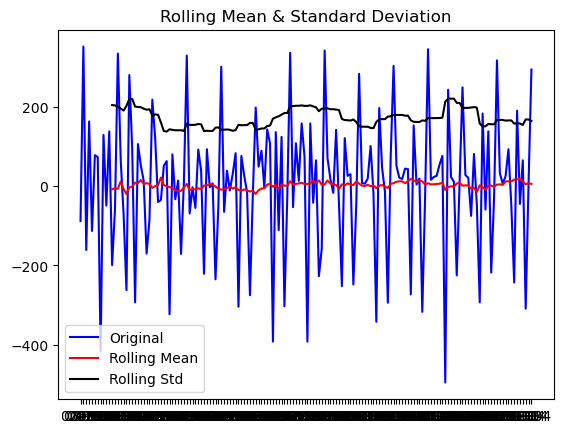

Results of Dickey-Fuller Test:
Test Statistic                  -3.326843
p-value                          0.013720
#Lags Used                      13.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


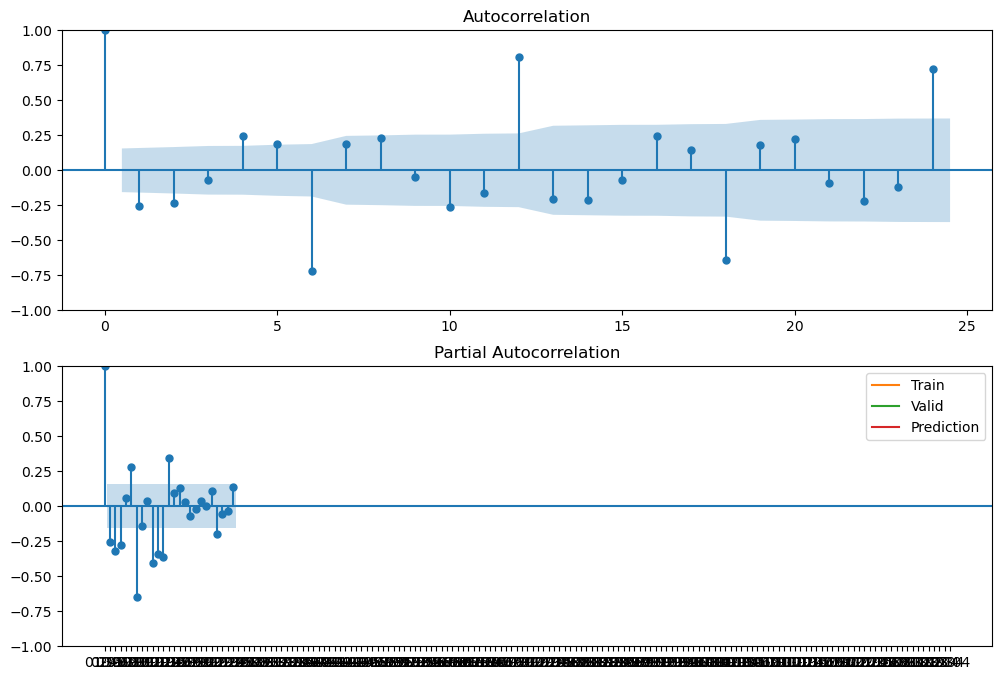

Validation RMSE: 256.8027952025294
Validation MAPE: 11.026761321953908


In [72]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# Make sure your dataset has a 'Date' or 'Time' column and a 'Footfalls' column
df = pd.read_csv('footfalls.csv')

# Convert the date or time column to a datetime object if it's not already
df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df['Month'] = df['Month'].apply(lambda x: x.strftime('%m-%y'))

# Set the 'Date' column as the index of the DataFrame
df.set_index('Month', inplace=True)

# Split the data into training and validation sets (70% train, 30% validation)
train_size = int(len(df) * 0.7)
train, valid = df[:train_size], df[train_size:]

# Check for stationarity using Dickey-Fuller test
def test_stationarity(timeseries, window=12):
    # Calculate rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Check stationarity for the entire dataset
test_stationarity(df['Footfalls'])

# Differencing to make the series stationary
first_diff = df['Footfalls'] - df['Footfalls'].shift(1)
first_diff = first_diff.dropna(inplace=False)
test_stationarity(first_diff, window=12)

# Plot ACF and PACF to determine the order of the ARIMA model
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=24, ax=ax2)

# Fit the ARIMA model
arima_mod = sm.tsa.ARIMA(train['Footfalls'], order=(1, 1, 1))
arima_mod = arima_mod.fit()

# Forecast
forecast = arima_mod.forecast(steps=len(valid))

# Plot the forecasted values against the validation dataset
forecast_1 = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])
plt.plot(train['Footfalls'], label='Train')
plt.plot(valid['Footfalls'], label='Valid')
plt.plot(forecast_1, label='Prediction')
plt.legend()
plt.show()

# Calculate RMSE
rms = sqrt(mean_squared_error(valid['Footfalls'], forecast))
print("Validation RMSE:", rms)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(valid['Footfalls'], forecast)
print("Validation MAPE:", mape)

# Retrain the model on the entire dataset for future predictions (optional)
arima_mod_full = sm.tsa.ARIMA(df['Footfalls'], order=(1, 1, 1))
arima_mod_full = arima_mod_full.fit()


In [80]:
# Forecast future values
future_steps = 10  # Number of future steps to forecast
forecast_future = arima_mod_full.forecast(steps=future_steps)

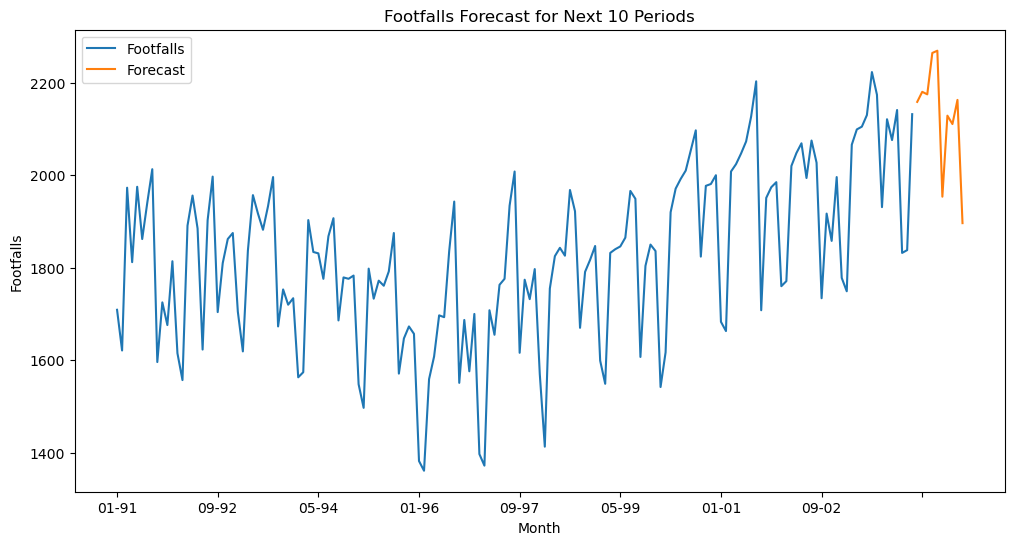

In [85]:
# Train the model on the full dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Footfalls'], 
                order=(0, 1, 1), 
                seasonal_order=(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 10 periods
future_steps = 10
forecast = result.predict(start=len(df), 
                          end=(len(df) - 1) + future_steps, 
                          typ='levels').rename('Forecast')
  
# Plot the forecast values
df['Footfalls'].plot(figsize=(12, 6), legend=True)
forecast.plot(legend=True)
plt.title('Footfalls Forecast for Next 10 Periods')
plt.xlabel('Month')
plt.ylabel('Footfalls')
plt.show()


In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming you have a DataFrame named 'train' with a 'Footfalls' column

# Define a range of p, d, and q values to search
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)

best_aic = np.inf
best_order = None

# Iterate through all possible combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = sm.tsa.ARIMA(train['Footfalls'], order=(p, d, q))
                results = model.fit()
                aic = results.aic
                
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    
            except:
                continue

print(f"Best AIC: {best_aic}")
print(f"Best Order (p, d, q): {best_order}")

# Now you can fit the best ARIMA model with the found order
best_model = sm.tsa.ARIMA(train['Footfalls'], order=best_order)
best_results = best_model.fit()

# You can use best_results for forecasting and analysis


Best AIC: 1355.830507663029
Best Order (p, d, q): (4, 2, 4)


In [101]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named 'train' with a 'Footfalls' column

# Define the ARIMA model with order=(p, d, q)
# In ARIMA(0,1,0), p=0 (no autoregressive terms), d=1 (first-order differencing), q=0 (no moving average terms)
p, d, q = 0, 1, 0
model = ARIMA(train["Footfalls"], order=(p, d, q))

# Fit the ARIMA model to the data
model_fit = model.fit()

# Calculate the AIC (Akaike's Information Criteria) value
aic_value = model_fit.aic

# Print the AIC value to assess model fit
print(f'AIC Value: {aic_value}')



AIC Value: 1442.1151454705255


In [102]:
# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Footfalls'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Footfalls   No. Observations:                  147
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -747.855
Date:                            Sun, 20 Aug 2023   AIC                           1505.710
Time:                                    22:26:02   BIC                           1520.199
Sample:                                01-01-1991   HQIC                          1511.597
                                     - 03-01-2003                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4725      0.077     -6.154      0.000      -0.623      -0.322
ar.S.L12       0.1883      0.171      1.104      0.270      -0.146       0.523
ar.S.L24       0.1094      0.141      0.773      0.439      -0.168       0.387
ma.S.L12      -0.9807      1.134     -0.865      0.387      -3.202       1.241
sigma2      3523.2422   3565.149      0.988      0.323   -3464.322    1.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.68   Prob(JB):                         0.55
Heteroskedasticity (H):               0.63   Skew:                            -0.21
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

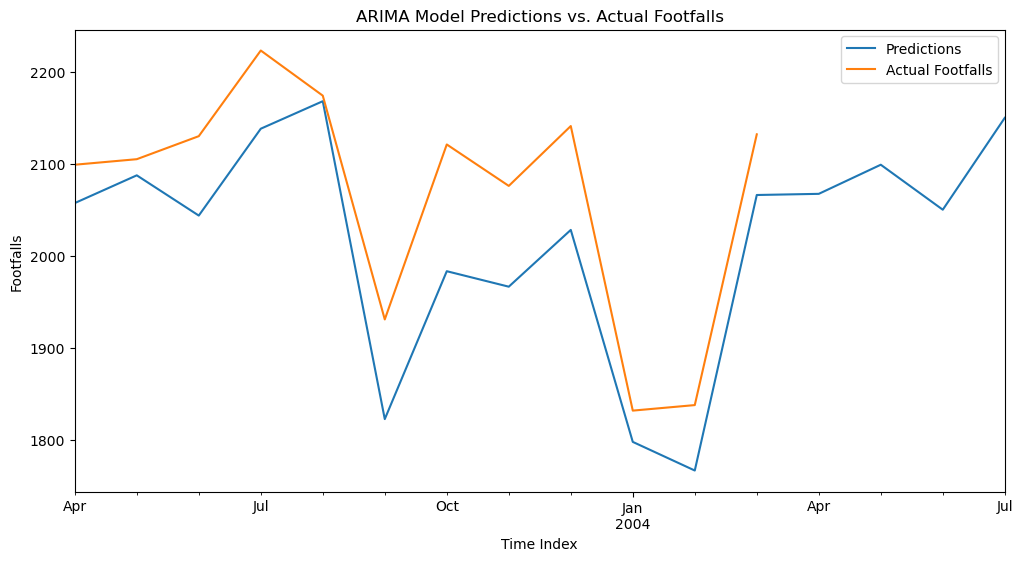

In [111]:
import matplotlib.pyplot as plt

# Calculate the start and end indices for the test set
start = len(train)
end = len(train) + len(test) + 3

# Make predictions for the test set using the ARIMA model
predictions = result.predict(start=start, end=end, typ='levels').rename("Predictions")

# Plot predictions and actual values
plt.figure(figsize=(12, 6))
predictions.plot(legend=True, label='Predictions')
test['Footfalls'].plot(legend=True, label='Actual Footfalls')
plt.title("ARIMA Model Predictions vs. Actual Footfalls")
plt.xlabel("Time Index")
plt.ylabel("Footfalls")
plt.legend()
plt.show()
